# Inital data analysis of the virtual screening results

This notebook does some general data anslysis on the virtual screening results.

It uses the output of the 1_DataPrep.ipynb notebook for it's data. 

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import os, glob, gzip

In [6]:
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors

In [7]:
# Set the default renderer to png as the data is huge and overwhelms the Javascript renderers
pio.renderers.default = 'png'

In [8]:
xx = pd.read_pickle('Mpro_16_data.pkl.gz')

In [9]:
xx.head()

NSMILES  \
0     BrC(Br)=Cc1ccc(Br)cc1   
2         BrC(Br)=Cc1ccncn1   
4         BrC(Br)=Cc1cncnc1   
6  BrC(CCC1CCCCC1)Cc1ccccn1   
8  BrC(CCC1CCCCC1)Cc1ccncc1   

                                            Molecule      Target  \
0  <img data-content="rdkit/molecule" src="data:i...  Mpro-x0678   
2  <img data-content="rdkit/molecule" src="data:i...  Mpro-x0104   
4  <img data-content="rdkit/molecule" src="data:i...  Mpro-x0104   
6  <img data-content="rdkit/molecule" src="data:i...  Mpro-x1249   
8  <img data-content="rdkit/molecule" src="data:i...  Mpro-x0678   

   TransFSScore    SCORE  SCORE.norm  Max_SuCOS_Score  \
0      0.162173 -14.4733    -1.31576         0.000000   
2      0.078375 -30.9106    -3.09106         0.284089   
4      0.076633 -33.4132    -3.34132         0.317920   
6      0.178053 -15.4443    -0.90849         0.434434   
8      0.431011 -23.7233    -1.39549         0.308991   

   Max_SuCOS_FeatureMap_Score  Max_SuCOS_Protrude_Score  Max_SuCOS_Index  \
0                    0.000000                  0.000000                0   
2                    0.024352                  0.543826               13   
4                    0.179804                  0.456035                2   
6                    0.151883                  0.716986               13   
8                    0.099810                  0.518171                8   

   Cum_SuCOS_Score  Cum_SuCOS_FeatureMap_Score  Cum_SuCOS_Protrude_Score  
0         0.000000                    0.000000                  0.000000  
2         2.078812                    0.424377                  3.733246  
4         2.072300                    0.394161                  3.750438  
6         3.900913                    1.153626                  6.648199  
8         3.210272                    0.578760                  5.841785

In [22]:
# Currently can't work out how to read the pickle correctly so we read the SDF instead
df = PandasTools.LoadSDF('./Mpro_16_data.sdf.gz', molColName='Molecule')
df.shape

(41582, 13)

In [23]:
df.dtypes

Target                        object
TransFSScore                  object
SCORE                         object
SCORE.norm                    object
Max_SuCOS_Score               object
Max_SuCOS_FeatureMap_Score    object
Max_SuCOS_Protrude_Score      object
Max_SuCOS_Index               object
Cum_SuCOS_Score               object
Cum_SuCOS_FeatureMap_Score    object
Cum_SuCOS_Protrude_Score      object
ID                            object
Molecule                      object
dtype: object

In [37]:
# So we need to fix all the column types again!

df = df.astype(dtype= {
    "Cum_SuCOS_FeatureMap_Score":"float64",
    "Cum_SuCOS_Protrude_Score":"float64",
    "Cum_SuCOS_Score":"float64",
    "Max_SuCOS_Index":"float64",
    "Max_SuCOS_FeatureMap_Score":"float64",
    "Max_SuCOS_Protrude_Score":"float64",
    "Max_SuCOS_Score":"float64",
    "SCORE":"float64",
    "SCORE.norm":"float64",
    "TransFSScore":"float64"
})
df =  df.astype(dtype= {
    "Max_SuCOS_Index":"int64",
})

df = df.rename(columns={"ID": "NSMILES"})

Target  TransFSScore    SCORE  SCORE.norm  Max_SuCOS_Score  \
0  Mpro-x0678      0.162173 -14.4733    -1.31576         0.000000   
1  Mpro-x0104      0.078375 -30.9106    -3.09106         0.284089   
2  Mpro-x0104      0.076633 -33.4132    -3.34132         0.317920   
3  Mpro-x1249      0.178053 -15.4443    -0.90849         0.434434   
4  Mpro-x0678      0.431011 -23.7233    -1.39549         0.308991   

   Max_SuCOS_FeatureMap_Score  Max_SuCOS_Protrude_Score  Max_SuCOS_Index  \
0                    0.000000                  0.000000                0   
1                    0.024352                  0.543826               13   
2                    0.179804                  0.456035                2   
3                    0.151883                  0.716986               13   
4                    0.099810                  0.518171                8   

   Cum_SuCOS_Score  Cum_SuCOS_FeatureMap_Score  Cum_SuCOS_Protrude_Score  \
0         0.000000                    0.000000                  0.000000   
1         2.078812                    0.424377                  3.733246   
2         2.072300                    0.394161                  3.750438   
3         3.900913                    1.153626                  6.648199   
4         3.210272                    0.578760                  5.841785   

                    NSMILES                                           Molecule  
0     BrC(Br)=Cc1ccc(Br)cc1  <img data-content="rdkit/molecule" src="data:i...  
1         BrC(Br)=Cc1ccncn1  <img data-content="rdkit/molecule" src="data:i...  
2         BrC(Br)=Cc1cncnc1  <img data-content="rdkit/molecule" src="data:i...  
3  BrC(CCC1CCCCC1)Cc1ccccn1  <img data-content="rdkit/molecule" src="data:i...  
4  BrC(CCC1CCCCC1)Cc1ccncc1  <img data-content="rdkit/molecule" src="data:i...
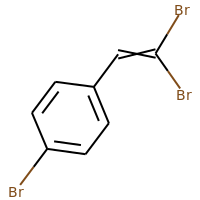
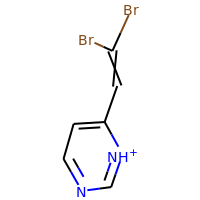
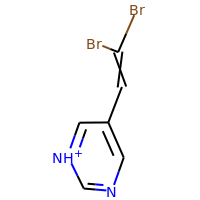
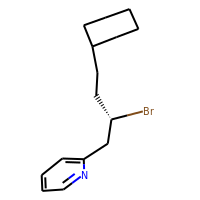
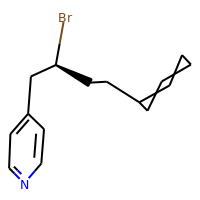

In [38]:
df.head()

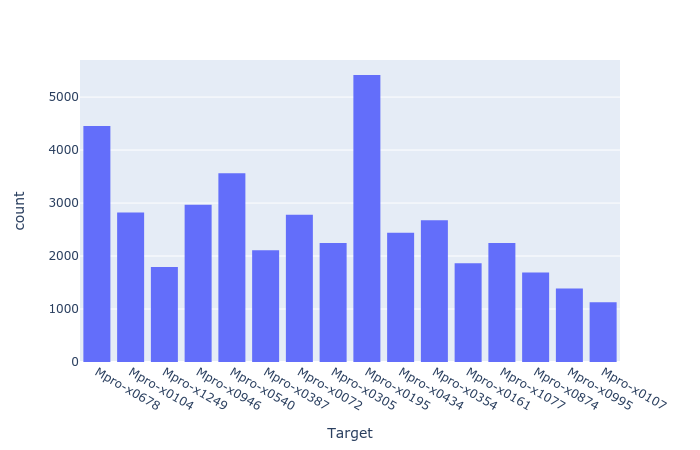

In [39]:
# Let's look at which targets the best TransFSScoring poses came from
fig = px.histogram(df, x="Target")
fig.show()

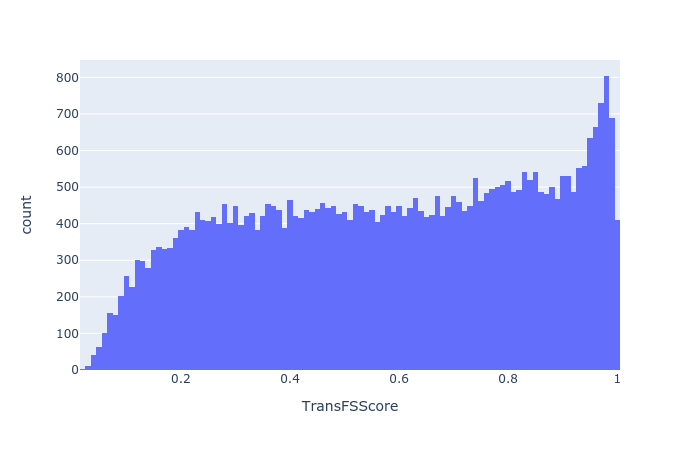

In [40]:
# Let's look at the distribution of TransFSSCores
fig = px.histogram(df, x="TransFSScore")
fig.show()

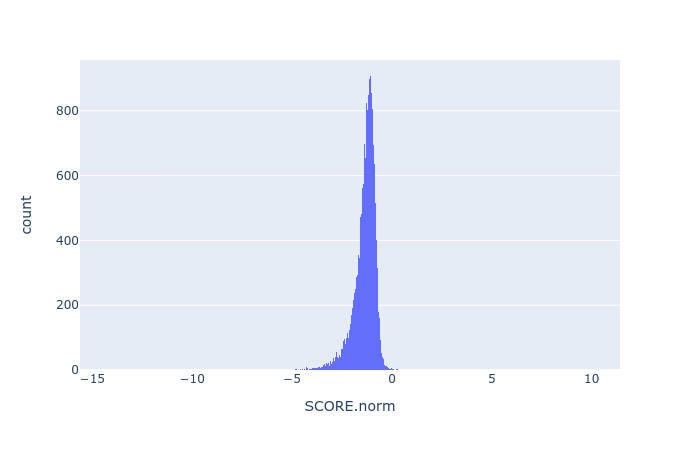

In [41]:
# Let's look at the distribution of normalised docking scores.
# The more negative the number the better.
fig = px.histogram(df, x="SCORE.norm")
fig.show()

# these cluster around -2 but there are wild outliers

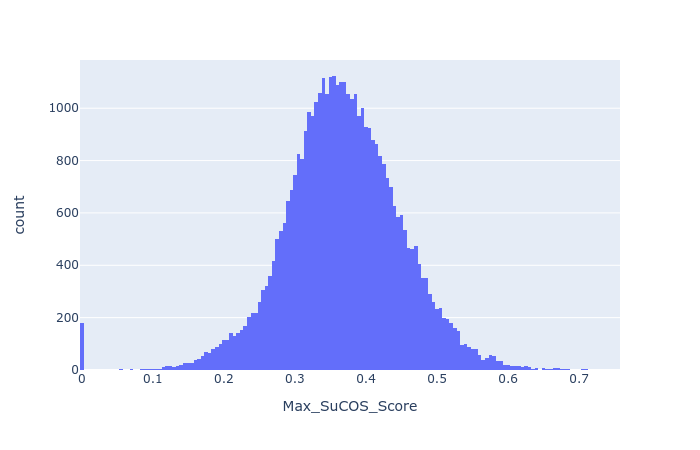

In [42]:
# Let's look at the distribution of Max_SuCOS_Score scores
fig = px.histogram(df, x="Max_SuCOS_Score")
fig.show()
# Susan's rule of thumb is that anything above 0.5 is 'reasonable'.

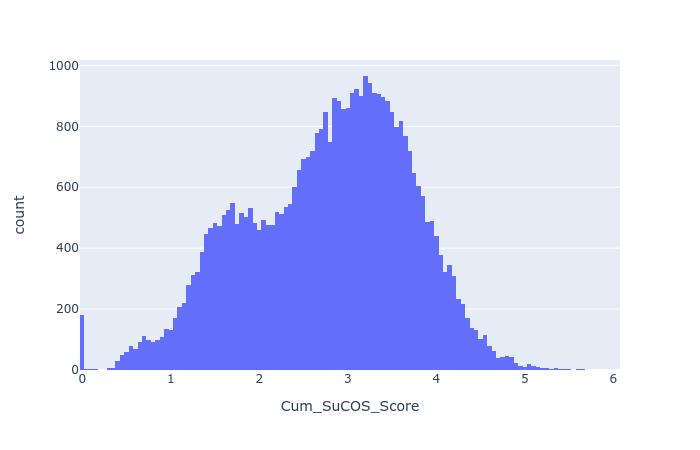

In [43]:
# Let's look at the distribution of Cum_SuCOS_Score scores.
# These might be more useful than the Max_SuCOS_Score as it includes overlap with all hit ligands?
fig = px.histogram(df, x="Cum_SuCOS_Score")
fig.show()

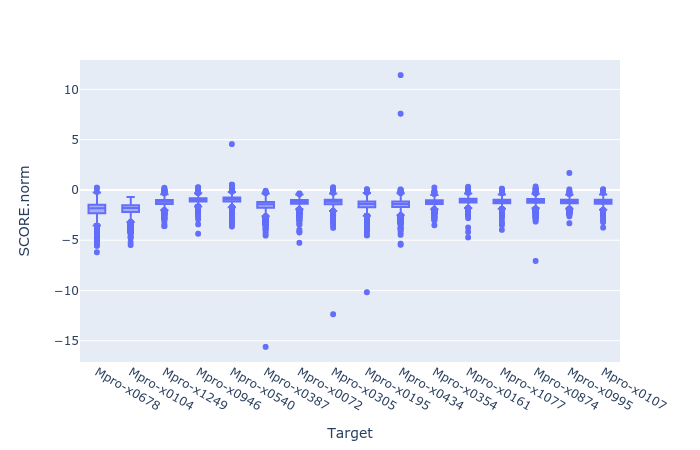

In [44]:
# Let's check the distribution of normalised docking scrores across the targets.
# Low (negative) scores are better.
fig = px.box(df, x="Target", y="SCORE.norm")
fig.show()

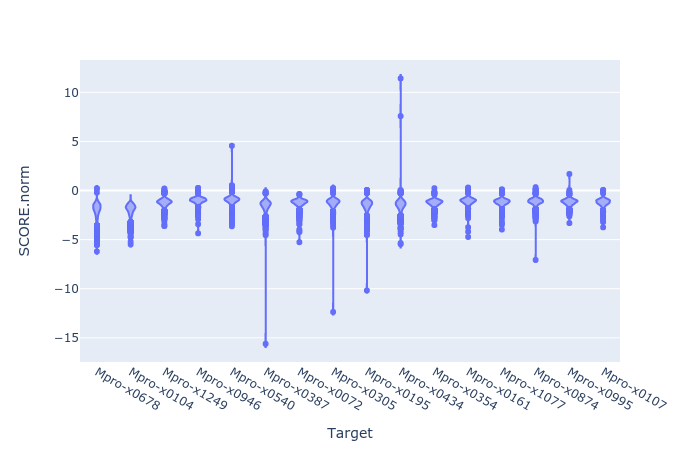

In [45]:
# You can instead use a violin plot for a different view of this
fig = px.violin(df, x="Target", y="SCORE.norm")
fig.show()

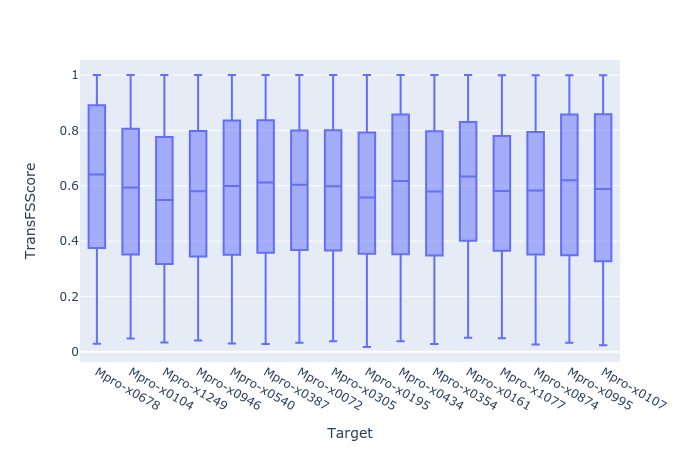

In [46]:
# Now the TransFSScore
fig = px.box(df, x="Target", y="TransFSScore")
fig.show()

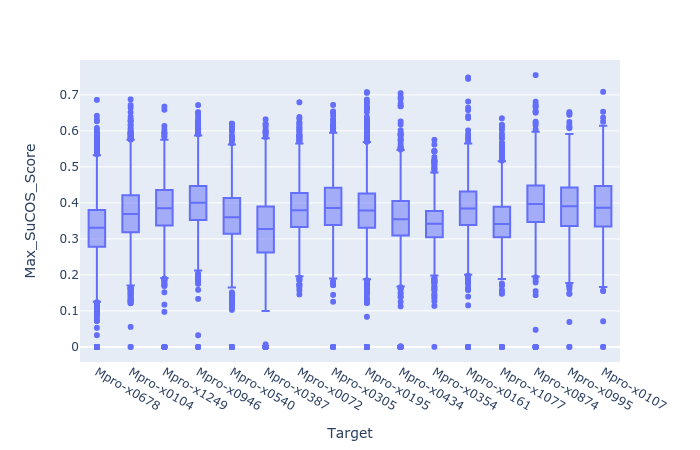

In [47]:
# And the Max_SuCOS_Score
fig = px.box(df, x="Target", y="Max_SuCOS_Score")
fig.show()

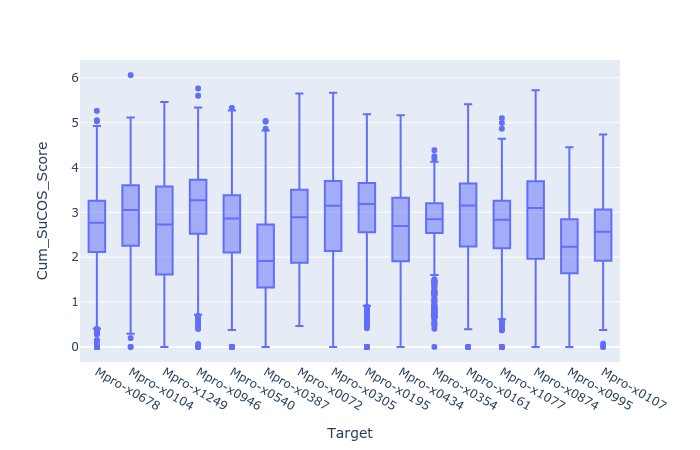

In [48]:
# And the Cum_SuCOS_Score
fig = px.box(df, x="Target", y="Cum_SuCOS_Score")
fig.show()

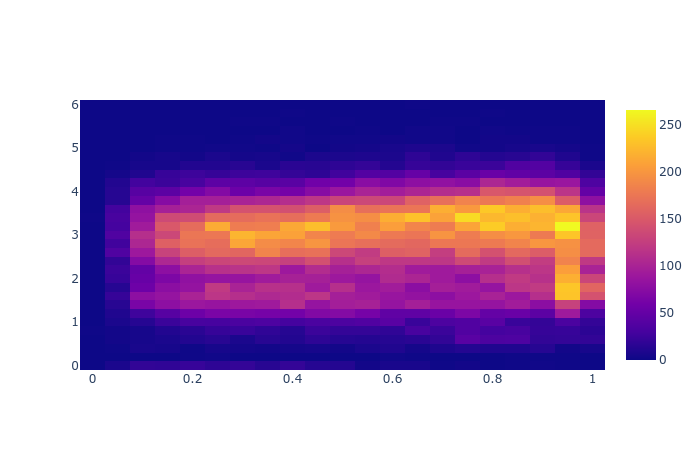

In [49]:
# Let's see how the TransFSScore compare with the Cum_SuCOS_Score.
fig = go.Figure(go.Histogram2d(
        x=df['TransFSScore'],
        y=df['Cum_SuCOS_Score']
    ))
fig.show()
# Not much of a correlation. But that's not too surprising and may be good if we use both to filter 
# as they are orthoganal.

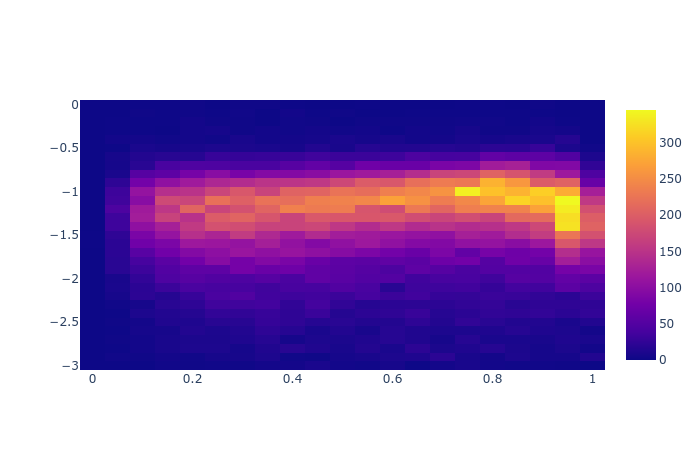

In [50]:
# How about correlation of TransFSScore with normalised docking score
# We need to filter the docking score because of the outliers
filtered_df = df[(df['SCORE.norm'] < 0) & (df['SCORE.norm'] > -3)]
fig = go.Figure(go.Histogram2d(
        x=filtered_df['TransFSScore'],
        y=filtered_df['SCORE.norm']
    ))
fig.show()
# No real correlation visible 

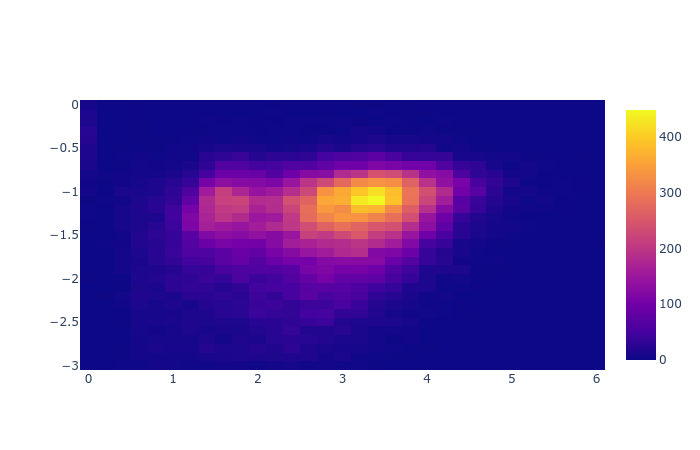

In [51]:
# How about correlation of Cum_SuCOS_Score with normalised docking score
# We need to filter the docking score because of the outliers
filtered_df = df[(df['SCORE.norm'] < 0) & (df['SCORE.norm'] > -3)]
fig = go.Figure(go.Histogram2d(
        x=filtered_df['Cum_SuCOS_Score'],
        y=filtered_df['SCORE.norm'],
    ))
fig.show()
# No real correlation visible